# Deep Learning Lab Week 6
## Exercise 2
## Pratinav Seth
## 200968216

EXERCISE 2:

Use the google stock price dataset available in Kaggle.
https://www.kaggle.com/datasets/medharawat/google-stock-price
Using a training set of 50 time steps, build a Simple RNN model vs a LSTM model, both with 4 layers. Compare their accuracy using an mean square error. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

In [6]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d medharawat/google-stock-price

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/23.4k [00:00<?, ?B/s]
100% 23.4k/23.4k [00:00<00:00, 32.5MB/s]


In [8]:
file_name = "/content/google-stock-price.zip"

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Google_Stock_Price_Test.csv                    2019-09-29 07:21:16         1029
Google_Stock_Price_Train.csv                   2019-09-29 07:21:16        63488
Extracting all the files now...
Done!


In [9]:
data = pd.read_csv("/content/Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Since the test set contains the values of 2017, we will be using test set for the second question of the exercise.

In [10]:
test_data = pd.read_csv("/content/Google_Stock_Price_Test.csv")
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [11]:
data_set = data.loc[:, ["Open"]].values
train = data_set[:len(data_set)]
train.reshape(train.shape[0],1)

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
test_data = test_data.loc[:, ['Open']].values

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
train_scaler = scaler.fit_transform(train)

In [14]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(1208, 50, 1)

### RNN

In [16]:
regressor = Sequential()
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = "adam", loss = "mean_squared_error")
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 29ms/step - loss: 0.3328
Epoch 2/100
38/38 [==============================] - 1s 29ms/step - loss: 0.2081
Epoch 3/100
38/38 [==============================] - 2s 41ms/step - loss: 0.1335
Epoch 4/100
38/38 [==============================] - 2s 53ms/step - loss: 0.1086
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0865
Epoch 6/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0700
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0577
Epoch 8/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0551
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0392
Epoch 10/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0358
Epoch 11/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0320
Epoch 12/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0283
Epoch 13/100
38/38 [=====

In [17]:
test_input = data_set[-50:]
test_set = np.concatenate((test_input, test_data), axis = 0)
test_set.shape

(70, 1)

In [18]:
inputs = test_set
inputs = scaler.transform(inputs)

In [19]:
inputs.shape

(70, 1)

In [20]:
X_test = []
Y_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    Y_test.append(inputs[i,0])
    
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

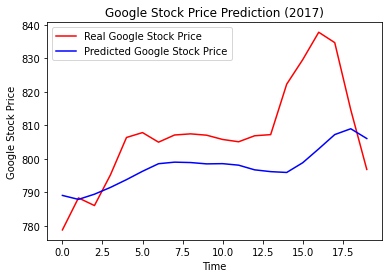

In [21]:
plt.plot(test_data, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction (2017)")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

### LSTM

In [22]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [23]:
model = Sequential()
model.add(LSTM(timesteps, return_sequences=True, input_shape = (1, timesteps)))
model.add(LSTM(timesteps, return_sequences=True))
model.add(LSTM(timesteps, return_sequences=True))
model.add(LSTM(timesteps))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50
1208/1208 [==============================] - 10s 5ms/step - loss: 0.0091
Epoch 2/50
1208/1208 [==============================] - 7s 6ms/step - loss: 0.0023
Epoch 3/50
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 4/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 5/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 6/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 7/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 8/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 9/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 10/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0010
Epoch 11/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 12/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0011


In [24]:
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

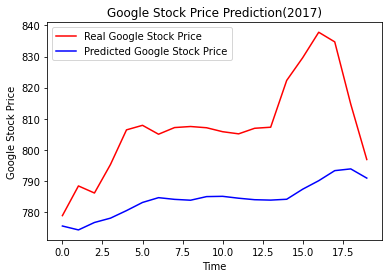

In [25]:
plt.plot(test_data, color = "red", label = "Real Google Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction(2017)")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()